<a href="https://colab.research.google.com/github/pra1608/Risk-Analysis/blob/master/ME780Examques2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Question* 2: Perform classification using decision tree and linear support vector machine for the threedimensional data.

##Importing neccessary libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

##Reading Data file for second question

In [16]:
df = pd.read_csv('/content/drive/MyDrive/ME780Exam/New folder/193109012@iitb.ac.in_Q2.csv')

##Data preprocessing

In [17]:
n_classes = len(df[df.columns[-1]].unique())                    # Number of classes in the data
plot_colors =  ['r', '#ff7f0e', 'y', '#ADD8E6', 'b']            # color for different classes
plot_step = 0.02                                                # meshing step
X1 = df[df.columns[:-1].values].values                          # converting data in numpy array(data features)
y1 = df[df.columns[-1]].values.reshape(-1,1)                    # target variable
X1 = StandardScaler().fit_transform(X1)                         # Transforming the data with mean 0 and std 1
#Splitting the into train and test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.1, random_state=42)

##**Plot of decision boundary of Decision tree classifier**

***Decision surface of a decision tree classifier using paired features for training data***




(-3.2077855443457866,
 3.1322144556542186,
 -3.3721728612110042,
 3.1078271387890015)

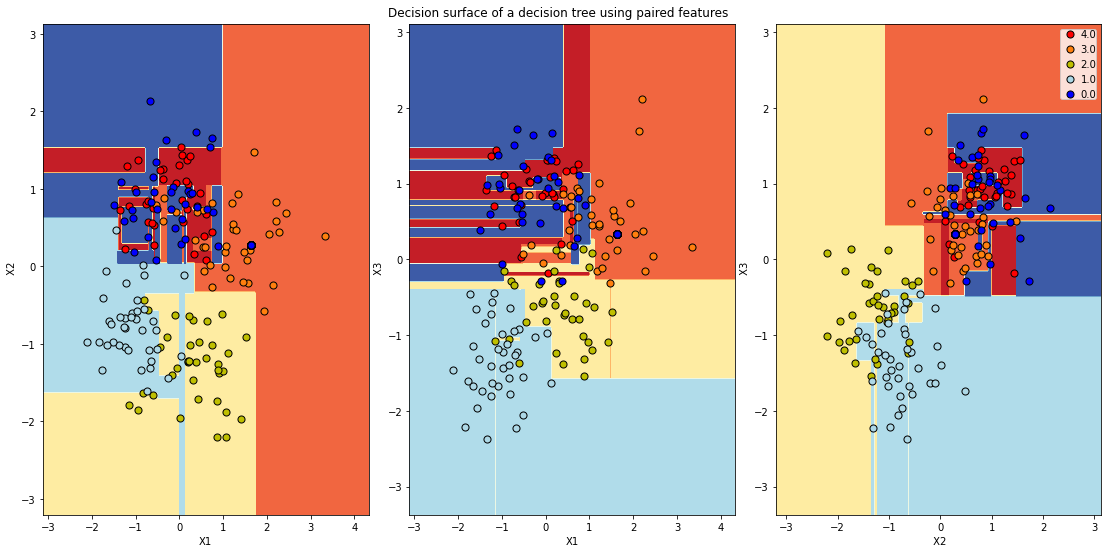

In [18]:
figure = plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2],[1, 2]]):
    # We only take the two corresponding features
    X = X_train[:,pair]
    y = y_train

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df.columns[:-1].values[pair[0]])
    plt.ylabel(df.columns[:-1].values[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=(df[df.columns[-1]].unique())[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")


***Decision surface of a decision tree classifier using paired features for test data***





(-2.9602563499605, 3.0397436500395054, -2.7480665102576705, 2.4719334897423337)

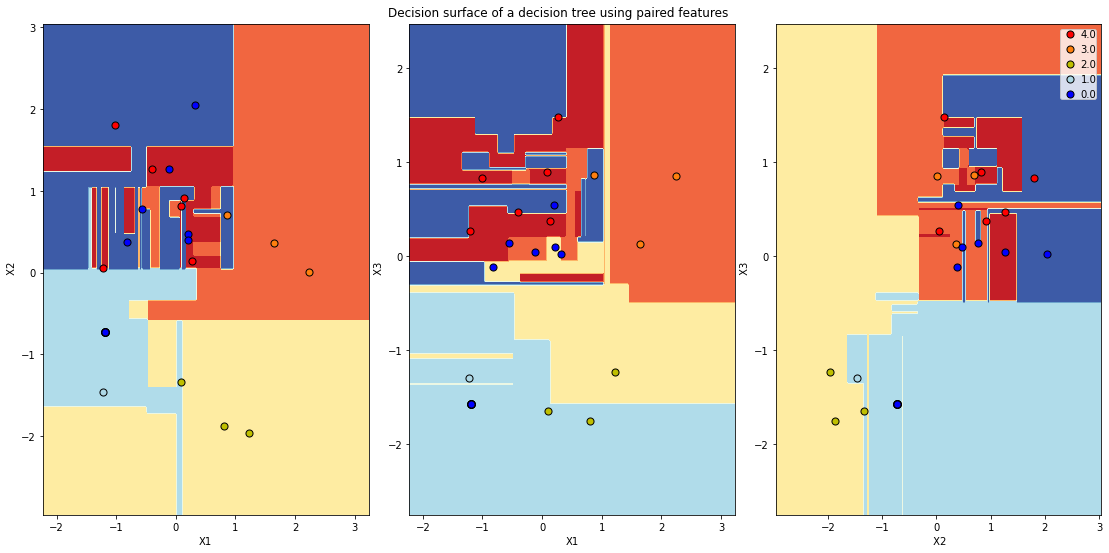

In [19]:
figure = plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2],[1, 2]]):
    # We only take the two corresponding features
    X = X_train[:,pair]
    y = y_train
    Xn = X_test[:,pair]
    yn = y_test
    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 3, pairidx + 1)

    x_min, x_max = Xn[:, 0].min() - 1, Xn[:, 0].max() + 1
    y_min, y_max = Xn[:, 1].min() - 1, Xn[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df.columns[:-1].values[pair[0]])
    plt.ylabel(df.columns[:-1].values[pair[1]])

    # Plot the test points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yn == i)
        plt.scatter(Xn[idx, 0], Xn[idx, 1], c=color, label=(df[df.columns[-1]].unique())[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")

Decision tree plot

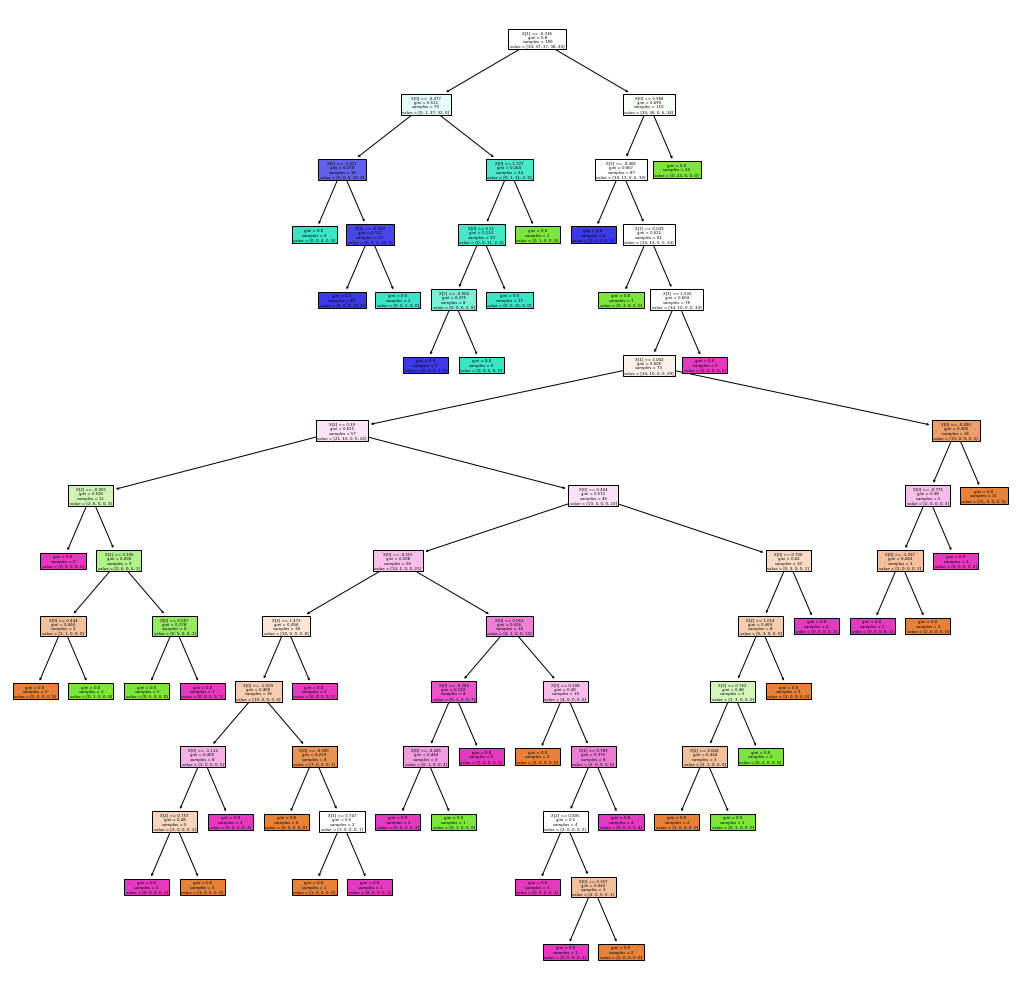

In [20]:
figure = plt.figure(figsize=(18, 18))
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.show()

##***Confusion Matrix for the Decision tree classifier***

**Confusion Matrix for training data**

Confusion matrix, without normalization
[[26  4  0  0  4]
 [ 2 32  0  0  3]
 [ 0  0 34  3  0]
 [ 0  0  2 36  0]
 [24  3  0  0  7]]
Normalized confusion matrix
[[0.76 0.12 0.   0.   0.12]
 [0.05 0.86 0.   0.   0.08]
 [0.   0.   0.92 0.08 0.  ]
 [0.   0.   0.05 0.95 0.  ]
 [0.71 0.09 0.   0.   0.21]]


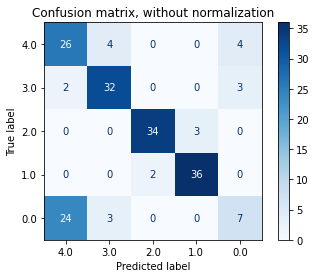

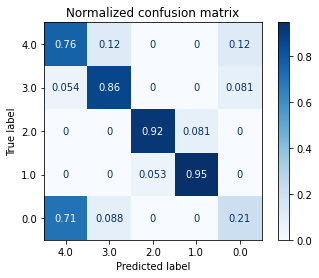

In [29]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp1 = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=(df[df.columns[-1]].unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp1.ax_.set_title(title)

    print(title)
    print(disp1.confusion_matrix)

plt.show()

**Confusion matrix for test data** 




Confusion matrix, without normalization
[[4 0 0 0 2]
 [0 3 0 0 0]
 [0 0 2 1 0]
 [0 0 0 2 0]
 [1 1 0 0 4]]
Normalized confusion matrix
[[0.67 0.   0.   0.   0.33]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   0.67 0.33 0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.17 0.17 0.   0.   0.67]]


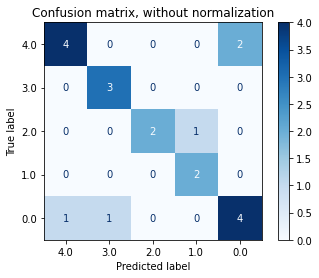

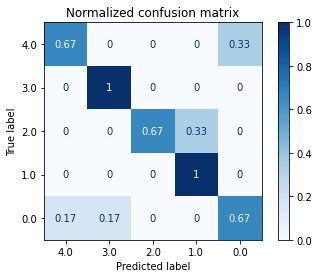

In [28]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:

    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=(df[df.columns[-1]].unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    

plt.show()

##**Plot of decision boundary of SVC classifier** 

***Decision surface of SVC classifier using paired features for training data***

(-3.2077855443457866,
 3.1322144556542186,
 -3.3721728612110042,
 3.1078271387890015)

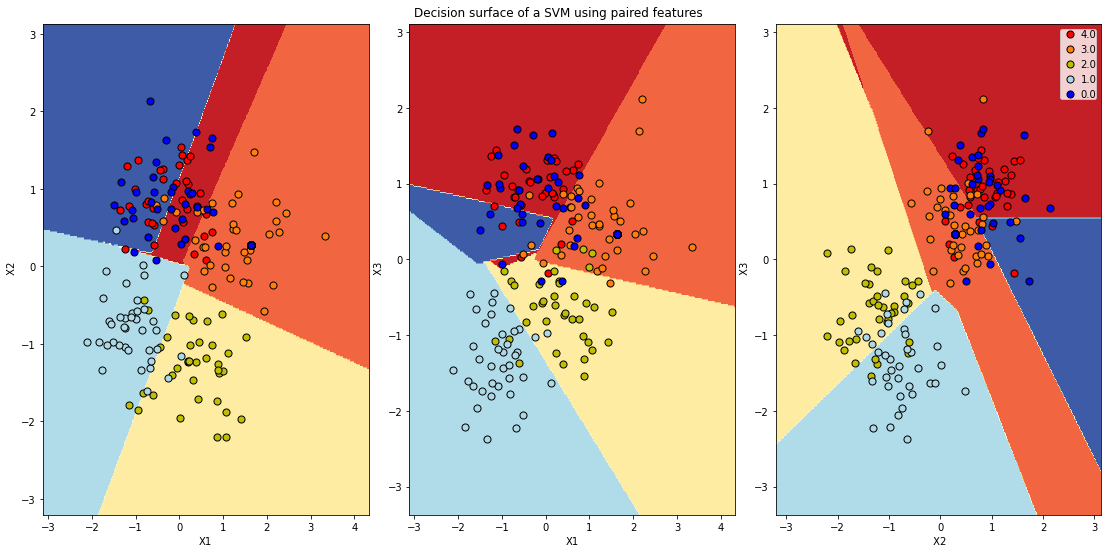

In [22]:
figure = plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2],[1, 2]]):
    # We only take the two corresponding features
    X = X_train[:,pair]
    y = y_train

    # Train
    clf = SVC(C = 100,kernel = 'linear',gamma = 'auto').fit(X,y.ravel())

    # Plot the decision boundary
    plt.subplot(1, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df.columns[:-1].values[pair[0]])
    plt.ylabel(df.columns[:-1].values[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], label=(df[df.columns[-1]].unique())[i],
                    cmap=plt.cm.RdYlBu, color = color,edgecolor='black', s=50)

plt.suptitle("Decision surface of a SVM using paired features")
plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")


***Decision surface of SVC classifier using paired features for test data***

(-2.9602563499605, 3.0397436500395054, -2.7480665102576705, 2.4719334897423337)

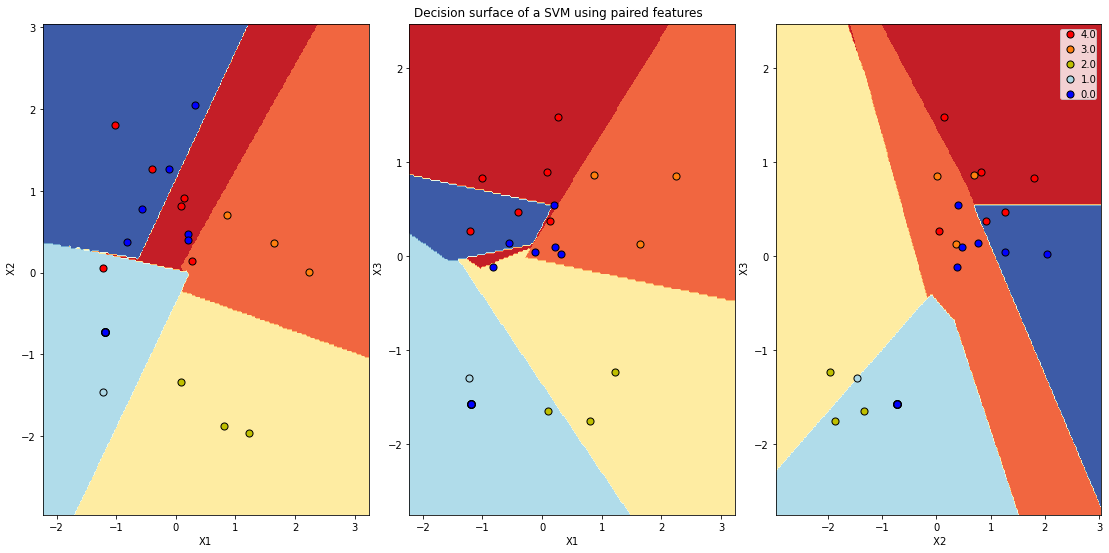

In [23]:
figure = plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2],[1, 2]]):
    # We only take the two corresponding features
    X = X_train[:,pair]
    y = y_train
    Xn = X_test[:,pair]
    yn = y_test

    # Train
    clf = SVC(C = 100,kernel = 'linear',gamma = 'auto').fit(X,y.ravel())

    # Plot the decision boundary
    plt.subplot(1, 3, pairidx + 1)

    x_min, x_max = Xn[:, 0].min() - 1, Xn[:, 0].max() + 1
    y_min, y_max = Xn[:, 1].min() - 1, Xn[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df.columns[:-1].values[pair[0]])
    plt.ylabel(df.columns[:-1].values[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yn == i)
        plt.scatter(Xn[idx, 0], Xn[idx, 1], label=(df[df.columns[-1]].unique())[i],
                    cmap=plt.cm.RdYlBu, color = color,edgecolor='black', s=50)

plt.suptitle("Decision surface of a SVM using paired features")
plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")


##Confusion Matrix for SVC classifier

***Confusion Matrix for training Data***

Confusion matrix, without normalization
[[26  4  0  0  4]
 [ 2 32  0  0  3]
 [ 0  0 34  3  0]
 [ 0  0  2 36  0]
 [24  3  0  0  7]]
Normalized confusion matrix
[[0.76 0.12 0.   0.   0.12]
 [0.05 0.86 0.   0.   0.08]
 [0.   0.   0.92 0.08 0.  ]
 [0.   0.   0.05 0.95 0.  ]
 [0.71 0.09 0.   0.   0.21]]


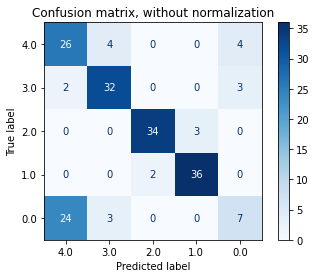

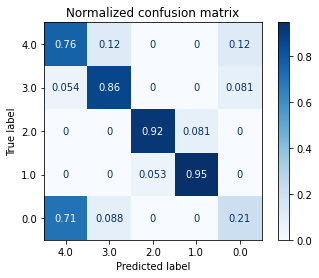

In [30]:
from sklearn.metrics import plot_confusion_matrix
clf = SVC(C = 10,kernel = 'linear',gamma = 'auto').fit(X_train,y_train.ravel())
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=(df[df.columns[-1]].unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Confusion Matrix for test Data**

Confusion matrix, without normalization
[[4 0 0 0 2]
 [0 3 0 0 0]
 [0 0 2 1 0]
 [0 0 0 2 0]
 [1 1 0 0 4]]
Normalized confusion matrix
[[0.67 0.   0.   0.   0.33]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   0.67 0.33 0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.17 0.17 0.   0.   0.67]]


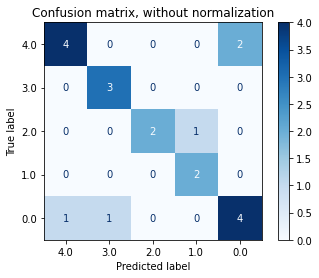

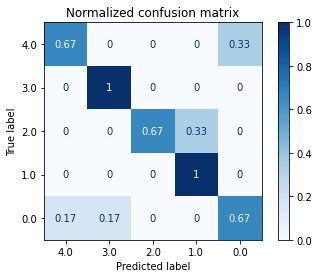

In [31]:
from sklearn.metrics import plot_confusion_matrix
clf = SVC(C = 10,kernel = 'linear',gamma = 'auto').fit(X_train,y_train.ravel())
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=(df[df.columns[-1]].unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()